In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

In general the general mass balance in gas phase is:

\begin{equation*}\frac{d C}{d t} = - u \frac{d C}{d x} + D \frac{d^2 C}{d x^2} + R\left(C,T\right) \tag{1}\end{equation*}

If we further assume that there is axial dispersion and we are in the steady state then the equation becomes:

\begin{equation*}0 = - u \frac{d C}{d x} + D \frac{d^2 C}{d x^2} + R\left(C,T\right) \tag{2}\end{equation*}

where:

*u: superficial velocity*

*D: axial dispersion coefficient*

*Ri: reaction rate*

*Ci: concentration of species*


The ODE obeys the following boundary conditions:

\begin{equation*}C_{io} = C_{i} - \frac{D}{u}\frac{d C_i}{d x}  ~at\left(x = 0\right) \tag{3}\end{equation*}

\begin{equation*}\frac{d C_i}{d x} = 0  ~at\left(x = L\right) \tag{4}\end{equation*}

where *L* is the total length of the reactor.

For the sake of convenience the ODE is scaled by creating dimensionless variables as following:

\begin{equation*}v_i = \frac{C_i}{C_{io}} = X_i \tag{5}\end{equation*}

\begin{equation*}z = \frac{x}{L} \tag{6}\end{equation*}

and by making:

\begin{equation*}C_i = C_{io}(1 - X_i) \tag{7}\end{equation*}

the dependent variable represents the conversion of the reactant: 


The ODE is now:

\begin{equation*}\frac{C_{io}u}{L} \frac{d v_i}{d z} = (\frac{C_{io}D}{L^2} \frac{d^2 v_i}{d z^2} + R_iL^2) \tag{8a}\end{equation*}

\begin{equation*}\frac{d^2 v_i}{d z^2} = Pe(\frac{d v_i}{dz} + R_i\frac{L}{C_{io}u}) \tag{8b}\end{equation*}
                                                                       
where:

\begin{equation*}Pe = \frac{uL}{D} \tag{9}\end{equation*}
                                                                        
with Boundary Conditions (BC) given by:

\begin{equation*}\frac{d v_i}{dz} = v_iPe~at~z = 0 \tag{10a}\end{equation*}

Note that the boundary condition for z = 0 is specified from equation (10b), however for this example equation (10a) is used.

\begin{equation*}\frac{d v_i}{dz} = Pe(v_i - 1)~at~z = 0 \tag{10b}\end{equation*}

\begin{equation*}\frac{d v_i}{dz} = 0~v_i~at~z = 1 \tag{11}\end{equation*}

The problem is to find the concentration of the reactant at the outlet for a first order reaction:

\begin{equation*}R_i = kC_{io}(1 - v_i) \tag{12}\end{equation*}

\begin{equation*}\frac{kL}{u} = k_{t} \tag{13}\end{equation*}

\begin{equation*}\frac{d^2 v_i}{d z^2} = Pe(\frac{d v_i}{dz} + kC_{io}(1 - v_i)\frac{L}{C_{io}u}) \tag{14}\end{equation*}

\begin{equation*}\frac{d^2 v_i}{d z^2} = Pe(\frac{d v_i}{dz} + k_t(1 - v_i)) \tag{15}\end{equation*}

with Pe = 16, C$_{io}$ = 1 and k$_t$ = 2.0.

***The problem was taken from E. B. Nauman, Chemical Reactor Design, Optimization, and Scaleup, McGraw-Hill, 2001***

----------------------------------------------------------
The numerical solution of the problem at the outlet is:
Final Conversion =  1.000
Final Concentration = -0.000
----------------------------------------------------------


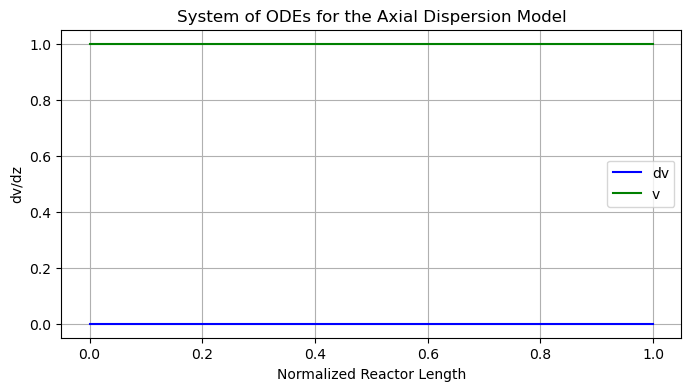

In [10]:
# Definition of the problem parameters

Pe = 16.0
Ci0 = 1.0
kt = 2.0

def ode(z, Y):
    # the dependent variable represents the conversion
    v, dv = Y
    
    ddv = Pe*(dv - kt*(1.0-v)) # from equation (15)
    return np.stack([dv, ddv])

# set boundary conditions
def bc(va, vb):
    
    low_v, low_dv = va # left side
    up_v, up_dv = vb # right side
    
    return np.array([low_dv - low_v*Pe, up_dv])

x = np.linspace(0.0, 1.0, 100)
y = np.zeros((2, x.size))

sol = solve_bvp(ode, bc, x, y)

v, dv = sol.y

print ('----------------------------------------------------------')
print ('The numerical solution of the problem at the outlet is:')
print ('Final Conversion =  {:.3f}'.format(v[-1])) 
print ('Final Concentration = {:.3f}'.format(Ci0*(1-v[-1])))
print ('----------------------------------------------------------')

fig, ax = plt.subplots(figsize = (8,4), dpi = 100)
ax.plot(sol.x, dv, 'b-')
ax.plot(sol.x, v, 'g-')
ax.legend(('dv', 'v'))
ax.set_xlabel('Normalized Reactor Length')
ax.set_ylabel('dv/dz')
ax.set_title('System of ODEs for the Axial Dispersion Model')
ax.grid('True')